In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (12, 6)})

In [4]:
event_data = pd.read_csv('event_data_train.csv')

In [5]:
event_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')

In [8]:
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
event_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
event_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
event_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [12]:
event_data['day'] = event_data.date.dt.date

In [13]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


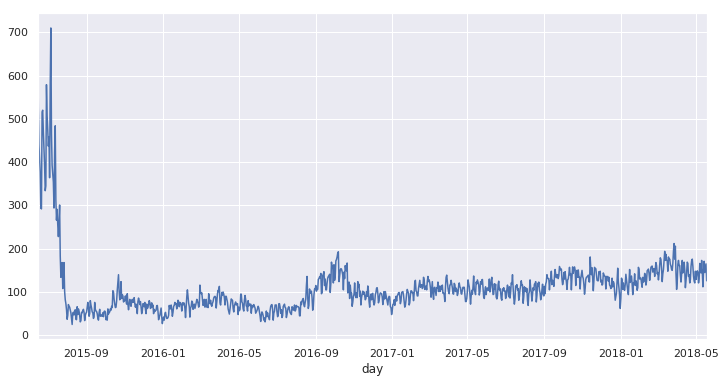

In [14]:
event_data.groupby('day').user_id.nunique().plot();

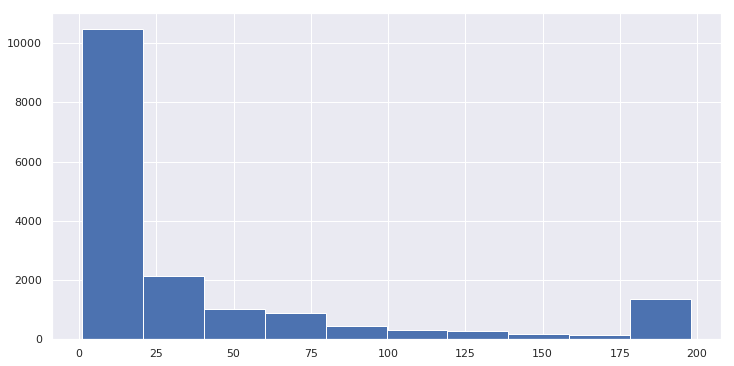

In [15]:
event_data[event_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist();

In [66]:
users_events_data = event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [67]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [17]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [18]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [19]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [65]:
users_scores = submissions_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [22]:
gap_data = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [23]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [24]:
gap_data = gap_data / (24 * 60 * 60)

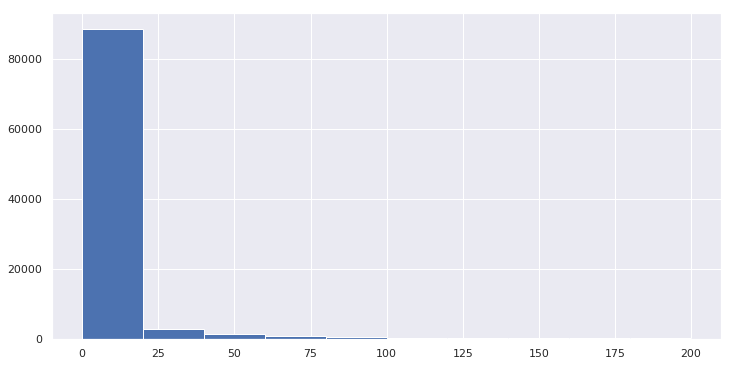

In [25]:
gap_data[gap_data < 200].hist();

In [26]:
gap_data.quantile(0.95)

59.760440972222156

In [27]:
submissions_data.groupby('user_id', as_index=False).aggregate({'date': 'count'}).max()

user_id    26798
date        1051
dtype: int64

In [28]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [29]:
submissions_data_corr = submissions_data[submissions_data.submission_status == 'correct']

In [30]:
ss = submissions_data_corr.groupby('user_id', as_index=False).aggregate({'submission_status': 'count'})

In [31]:
event_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [43]:
users_data = event_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [49]:
now = 1526772811
drop_out_threshold = 2592000

In [52]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [53]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [54]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [59]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [61]:
users_data = users_data.fillna(0)

In [68]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [75]:
users_days = event_data.groupby('user_id').day.nunique().to_frame().reset_index().head()

In [78]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [79]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1.0
1,2,1519226966,True,2.0,0.0,9,9,2,10,2.0
2,3,1444581588,True,29.0,23.0,91,87,30,192,7.0
3,5,1499859939,True,2.0,2.0,11,11,4,12,2.0
4,7,1521634660,True,0.0,0.0,1,1,0,1,1.0


In [80]:
users_data.user_id.nunique()

19234

In [81]:
event_data.user_id.nunique()

19234

In [82]:
users_data['passed_course'] = users_data.passed > 170

In [83]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1.0,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2.0,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7.0,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2.0,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1.0,False


In [84]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,5
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,0


In [85]:
100 * 1425 / 17809

8.001572238755685